# EDA of TSA Claims
---

## Table of Content
* [Introduction](#Introduction)
* [Problem Statement](#problem-statement)
* [About Dataset](#about-dataset)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Import Libraries](#import-libraries)
    * [Explore The Data](#explore-data)
    * [Pre-processing](#preprocessing)
        * [Whitespace](#whitespace)
        * [Missing Values](#missing-values)
        * [Data Formatting](#data-formatting)
        * [Duplicates](#duplicates)
        * [Binning Categorical Variables](#binning)
        * [Outliers](#outliers)
    * [Data Visualization & Analysis](#visualization)
        * [How are the characteristic of incindents that are filed against TSA?](#question1)
        * [How are the characteristic of claims that have higher close amount paid?](#question2)
* [Conclusion](#conclusion)
* [Recommendation](#recommendation)

## Introduction
---
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim. Our objectives are (1)exploring the incidents that are filed against TSA and (2)exploring which factors resulting in higher claim amount paid. So, hopefully we might be able to help TSA improve their services which resulting in lower expenses for claims.

## Problem Statement <a class="anchor" id="problem-statement"></a>
---

We will try analyzing the data to answer these questions:
- How are the characteristic of incidents that are filed against TSA?
- How are the characteristic of claims that have higher close amount paid?


## About Dataset <a class="anchor" id="about-dataset"></a>
---

We get the [TSA Claims Database](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database) dataset from Kaggle. The dataset includes claims filed between 2002 through 2015.

The dataset contains 24 features, each are:
1.  Claim Number
2.  Date Received
3.  Incident Date
4.  Airport Code
5.  Airport Name
6.  Airline Name
7.  Claim Type
8.  Claim Site
9.  Item
10. Claim Amount
11. Status
12. Close Amount
13. Disposition

## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

### 1. Import Libraries <a class="anchor" id="import-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import f_oneway

In [2]:
pd.set_option('display.max_colwidth', None)


### 2. Explore The Data <a class="anchor" id="explore-data"></a>

In [3]:
raw_data = pd.read_csv('tsa_claims.csv')
df = raw_data.copy()
df.head()

C:\Users\cindy\AppData\Local\Temp\ipykernel_17044\1881573368.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Here we are, facing our very first problem. We might notice there's a warning of **mixed data types** in some columns. We need to explore our dataset more before deciding on what data type would fit the columns perfectly. For now, I decide to make all the columns into **object** data type.

In [4]:
df = pd.read_csv('tsa_claims.csv', dtype = 'object')
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Alright, we have solved the warning issue. Let's continue exploring our data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


Now, it is clear that we have **13 columns** and **204,267 rows**.<br>
<br>
Although all of our data types are still **object**, there should be 
- **2 numerical columns**, which are 
    1. `Claim Amount`
    2. `Close Amount`
- **11 categorical columns**, which are: 
    1. `Claim Number`
    2. `Date Received`
    3. `Incident Date`
    4. `Airport Code`
    5. `Airport Name`
    6. `Airline Name`
    7. `Claim Type`
    8. `Claim Site`
    9. `Item`
    10. `Status`
    11. `Disposition`

We can see there is a lot of **missing values** in our columns.

In [6]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204244,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013123010324,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


Using `df.describe()`, we can get the **number of unique** and the **most frequent** data for each column.

In [7]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

Column Name  Number of Unique  \
0    Claim Number            204244   
1   Date Received              4007   
2   Incident Date             26807   
3    Airport Code               465   
4    Airport Name               485   
5    Airline Name               318   
6      Claim Type                11   
7      Claim Site                 6   
8            Item              4704   
9    Claim Amount             36117   
10         Status                15   
11   Close Amount             17162   
12    Disposition                 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Final overview before we start pre-processing our data. This might be hard to see, but there are **hidden missing values** in our data filled with **'-'**. We need to take care of it later to get the accurate number of missing values.

### 3. Pre-processing <a class="anchor" id="preprocessing"></a>

First, I will define some functions to help us deal with our data easier later.

In [8]:
# Function to check the sum of missing values in each column and their percentage
def missing_values(df):
    missing_values = df.isnull().sum().to_frame().reset_index()
    missing_values = missing_values.rename(columns = {'index': 'column', 0: 'number of missing values'})
    missing_values['% missing values'] = (missing_values['number of missing values']/df.shape[0]*100).round(2)
    
    return missing_values


# Function to show the number of rows with less than certain number of values in each row
# ex: missing_values_tresh(df,thresh=5) --> it will show the number of rows with less than 5 values in each row
def missing_values_tresh(df,thresh=0):
    # df = dataframe
    # thresh =  minimal number of values in each rows
    number_of_missing = len(df.columns) - thresh
    missing_values_in_rows = (df.isnull().sum(axis=1) > number_of_missing).value_counts()

    if len(missing_values_in_rows)>1:
        print(f'number of row with \033[1mless\033[0m than {thresh} values: {missing_values_in_rows[True]}')
    else:
        print(f'number of row with \033[1mless\033[0m than {thresh} values: 0')


# function to fill missing values with mean/median/mode based on certain group
# ex: fill_missing_values_by(df, missing_col='Airport Name', group='Claim Site', method='mode') 
#     --> It will fill the missing values in 'Airport Name' column with the most frequent value based on the 'Claim Site'     
def fill_missing_values_by(df_missing, missing_col, group, method):
    
    # df_missing = dataframe containing index that want to be filled
    # missing_col = name of the column that want to be filled
    # group = name of column to group the data by
    # method = mean, median, mode
    
    if method == 'mode':
        grouped_df = df.groupby(group)[missing_col].value_counts()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value].index[0]

    elif method == 'mean':
        grouped_df = df.groupby(group)[missing_col].mean()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value]
    
    elif method == 'median':
        grouped_df = df.groupby(group)[missing_col].median()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value]


# function to remove certain characters and format the data type
# ex: remove_and_format(df, ['Claim Amount', 'Close Amount], [';','$'], dtype='float64')
#     --> It will remove ';' and '$' characters from 'Claim Amount' and 'Close Amount' columns
#         also change the column format into 'float64'
def remove_and_format(df, col, remove, dtype='str'):
    if type(remove) == list:
        
        if type(col) == list:
            for i in col:
                for j in remove:
                    df[i] = df[i].str.replace(j,'', regex=False)
                df[i] = df[i].astype(dtype)

        elif type(col) == str:
            for j in remove:
                df[col] = df[col].str.replace(j,'', regex=False)
            df[col] = df[col].astype(dtype)

    elif type(remove) == str:
        
        if type(col) == list:
            for i in col:
                df[i] = df[i].str.replace(remove,'', regex=False)
                df[i] = df[i].astype(dtype)    

        elif type(col) == str:
            df[col] = df[col].str.replace(remove,'', regex=False)
            df[col] = df[col].astype(dtype)    




#### Whitespace <a class="anchor" id="whitespace"></a>
We will start our data pre-processing by cleaning all the whitespaces. It is done to make sure we don't get confused later.

In [9]:
df = df.apply(lambda x: x.str.strip())

#### Missing Values <a class="anchor" id="missing-values"></a>

We can use `df.isnull().sum()` to get the **number of missing values** in each column. We can also add the **percentage of missing values** to see the proportion of the missing values. I will use the function which is made earlier to make it easier.

In [10]:
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,263,0.13
2,Incident Date,2183,1.07
3,Airport Code,8524,4.17
4,Airport Name,8524,4.17
5,Airline Name,34374,16.83
6,Claim Type,7913,3.87
7,Claim Site,740,0.36
8,Item,3966,1.94
9,Claim Amount,4043,1.98


<AxesSubplot:>

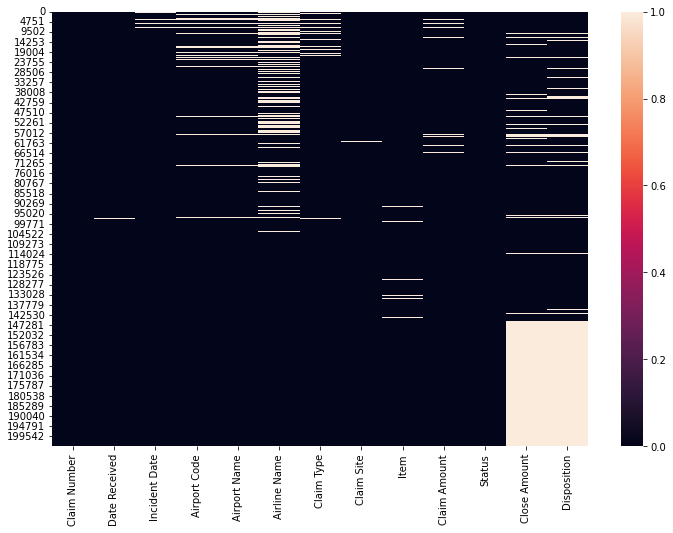

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df[df.columns].isnull())

Here, we can see the number of missing values and the percentage. But as I mentioned before, there are **hidden missing values** that we need to take care of first.

In [12]:
# replace '-' into NaN to be shown as missing values
df = df.replace('-', np.nan)

missing_values(df)


,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,263,0.13
2,Incident Date,2183,1.07
3,Airport Code,8965,4.39
4,Airport Name,8965,4.39
5,Airline Name,38621,18.91
6,Claim Type,8195,4.01
7,Claim Site,1016,0.50
8,Item,8389,4.11
9,Claim Amount,16795,8.22


<AxesSubplot:>

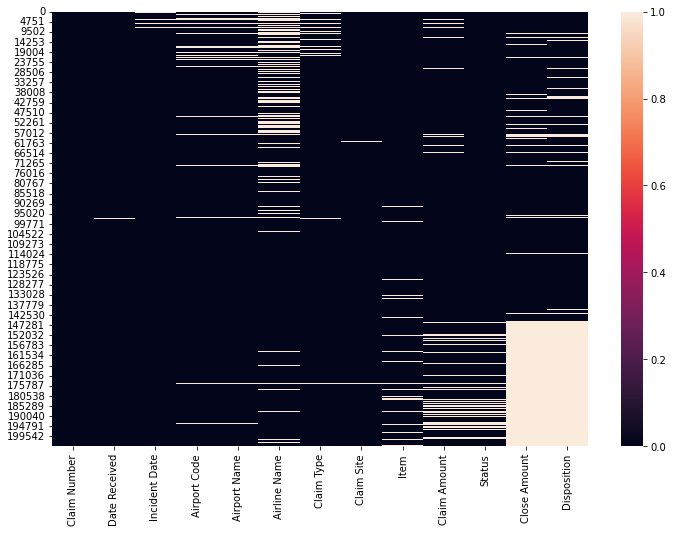

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df[df.columns].isnull())

Now, you can see the difference **before** and **after** we replace the '-' with NaN. All the hidden missing values are shown and we can get the **accurate number of missing values** for our further exploration.<br>
<br>
Before we start exploring deeper into the missing values of each column, I like to drop some rows that have **less than 5 values** in each row. It is done because they contain too little information that can be used for our analysis and it is hard to fill them with the right context.

In [14]:
missing_values_tresh(df,5)

number of row with less than 5 values: 256


In [15]:
df = df.dropna(how='any',axis=0,thresh=5)

missing_values_tresh(df,5)

number of row with less than 5 values: 0


It seems like there are **256 rows** with **less than 5 values** in each row. We already drop them and now we are ready to go deeper into the missing values of each column.

##### Date Received & Incident Date

For the `Date Received` and `Incident Date` columns, I will drop all the missing values because the percentage of missing values is small and we don't have sufficient informations about how to fill them. Also, it doesn't make any sense to fill them with mode or any values since it has a lot of uniques.

In [16]:
df = df.drop(df[df['Date Received'].isnull()].index)
df = df.drop(df[df['Incident Date'].isnull()].index)

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,7373,3.65
4,Airport Name,7373,3.65
5,Airline Name,36636,18.15
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


##### Airport Code and Airport Name
From the missing values table, we can see `Airport Code` and `Airport Name` have same number of missing values. Let's see if they have missing values in the same rows too.

In [17]:
len(df[(df['Airport Code'].isnull()) & (df['Airport Name'].isnull())])


7373

It turns out they both have all missing values in the same rows. So, we will take care of them at once. <br>
<br>
I will fill the missing values with the **most frequent values** based on `Claim Site` or `Claim Type` because I assume certain type of claims might occur more often in certain airport. If they're both missing, then I just fill them with **most frequent values** in the overall data.<br>
<br>
You can check the top 5 most frequent values for each `Claim Site` and `Claim Type` using the code below.

In [18]:
df.groupby('Claim Site')[['Airport Code', 'Airport Name']].value_counts().groupby(level=0, group_keys=False).head(5).to_frame()

0
Claim Site      Airport Code Airport Name                                          
Bus Station     EWR          Newark International Airport                         2
                JFK          John F. Kennedy International                        2
                ALB          Albany International                                 1
                ATL          Hartsfield-Jackson Atlanta International Airport     1
                RSW          Southwest Florida International                      1
Checked Baggage LAX          Los Angeles International Airport                 7245
                JFK          John F. Kennedy International                     7199
                EWR          Newark International Airport                      5608
                ORD          Chicago O'Hare International Airport              5377
                MIA          Miami International Airport                       5375
Checkpoint      LAX          Los Angeles International Airport                 2182
                JFK          John F. Kennedy International                     1906
                ORD          Chicago O'Hare International Airport              1347
                MCO          Orlando International Airport                     1319
                ATL          Hartsfield-Jackson Atlanta International Airport  1298
Motor Vehicle   ZZX          Non TSA Airport (motor vehicle)                    230
                TSA          TSA - Non-Specified Airport                         31
                I            Insurance Subrogation Claim                         17
                HDQ          Headquarters                                        12
                JFK          John F. Kennedy International                        9
Other           LAX          Los Angeles International Airport                   91
                JFK          John F. Kennedy International                       57
                ORD          Chicago O'Hare International Airport                53
                EWR          Newark International Airport                        53
                LGA          LaGuardia                                           42

In [19]:
df.groupby('Claim Type')[['Airport Code', 'Airport Name']].value_counts().groupby(level=0, group_keys=False).head(5).to_frame()

0
Claim Type              Airport Code Airport Name                                          
Bus Terminal            SYR          Syracuse-Hancock International                       1
Complaint               PHX          Phoenix Sky Harbor International                     4
                        F            Foreign airport                                      2
                        EWR          Newark International Airport                         2
                        DEN          Denver International Airport                         2
                        PSE          Mercedita Airport                                    2
Compliment              MMH          Mammoth Lakes                                        1
                        BFL          Meadows Field; Bakersfield Airport                   1
Employee Loss (MPCECA)  ORD          Chicago O'Hare International Airport                24
                        EWR          Newark International Airport                        22
                        LAX          Los Angeles International Airport                   21
                        MIA          Miami International Airport                         19
                        SEA          Seattle-Tacoma International                        16
Motor Vehicle           ZZX          Non TSA Airport (motor vehicle)                    165
                        TSA          TSA - Non-Specified Airport                         21
                        I            Insurance Subrogation Claim                         13
                        HDQ          Headquarters                                        10
                        JFK          John F. Kennedy International                        9
Passenger Property Loss JFK          John F. Kennedy International                     6324
                        LAX          Los Angeles International Airport                 5794
                        EWR          Newark International Airport                      4295
                        MCO          Orlando International Airport                     4045
                        MIA          Miami International Airport                       3926
Passenger Theft         LAX          Los Angeles International Airport                   26
                        SEA          Seattle-Tacoma International                        20
                        ORD          Chicago O'Hare International Airport                20
                        JFK          John F. Kennedy International                       17
                        ATL          Hartsfield-Jackson Atlanta International Airport    17
Personal Injury         LAX          Los Angeles International Airport                   64
                        MCO          Orlando International Airport                       52
                        JFK          John F. Kennedy International                       52
                        PHX          Phoenix Sky Harbor International                    48
                        LAS          McCarran International                              48
Property Damage         LAX          Los Angeles International Airport                 3260
                        ORD          Chicago O'Hare International Airport              2840
                        JFK          John F. Kennedy International                     2577
                        EWR          Newark International Airport                      2261
                        MIA          Miami International Airport                       2180
Wrongful Death          JAN          Jackson International                                2
                        HDQ          Headquarters                                         1
                        ZZX          Non TSA Airport (motor vehicle)                      1

You might wonder why do I go to such extent, using `value_counts()` and slicing it to show the top 5 most frequent values. <br> <br>
**The first reason** is I want to better understand our data and see if the 'mode' really represents our data. What if there is a lot number of uniques with frequency of 1 and our 'mode' just happens to have the frequency of 2. It might not be the best idea to use the 'mode' then.<br> <br>
Well, I did the simple `groupby()` with `mode()` to show the most frequent value but something unexpected came up.

In [20]:
df.groupby('Claim Site')[['Airport Code', 'Airport Name']].agg(pd.Series.mode).reset_index()

,Claim Site,Airport Code,Airport Name
0,Bus Station,"[EWR, JFK]","[John F. Kennedy International, Newark International Airport]"
1,Checked Baggage,LAX,Los Angeles International Airport
2,Checkpoint,LAX,Los Angeles International Airport
3,Motor Vehicle,ZZX,Non TSA Airport (motor vehicle)
4,Other,LAX,Los Angeles International Airport


**The second reason** why I don't use `mode()` is there are **2 most frequent values** in 'Bus Station' claim site. It might not be a big deal but it might be troublesome to access the value in larger number of uniques where you can't check all the rows manually. So, I go with value counts and take the first row (which is the mode) just to avoid something like this.
<br><br>
Next, we will start filling the missing values. I will use the function which already made earlier to save a lot of time.

In [21]:
# There are 3 process

# filling wiith the most frequent value basd on Claim Site
fill_missing_values_by(df, 'Airport Code', 'Claim Site', method='mode')
fill_missing_values_by(df, 'Airport Name', 'Claim Site', method='mode')

# filling with the most frequent value basd on Claim Type
fill_missing_values_by(df, 'Airport Code', 'Claim Type', method='mode')
fill_missing_values_by(df, 'Airport Name', 'Claim Type', method='mode')

# filling with the most frequent value in the overall data
df['Airport Code'] = df['Airport Code'].fillna(df['Airport Code'].mode()[0])
df['Airport Name'] = df['Airport Name'].fillna(df['Airport Name'].mode()[0])

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,36636,18.15
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


##### Airline Name
The `Airline Name` column has quite big percentage of missing values and I chose to fill them with the **most frequent value** based on `Airport Code` because different airports have their own most frequent value. I will make an exception for some airline codes because they don't have any airline names. The missing values will be filled with **'Not Available'**	

In [22]:
airport_code_group = df.groupby('Airport Code')['Airline Name'].value_counts().groupby(level=0, group_keys=False).head(3).to_frame()
airport_code_group.head(30)

Airline Name
Airport Code Airline Name                      
ABE          USAir                           22
             UAL                             17
             Delta Air Lines                 15
ABI          American Airlines               33
             American Eagle                   3
             Continental Airlines             1
ABQ          Southwest Airlines             316
             American Airlines              122
             Delta Air Lines                 98
ABR          Northwest Airlines              13
             Delta Air Lines                  8
             Frontier Airlines                1
ABY          Delta Air Lines                 24
             American Airlines                1
             Continental Airlines             1
ACK          Cape Air                         8
             Continental Airlines             6
             Jet Blue                         4
ACT          American Airlines               23
             Continental Airlines             3
             American Eagle                   2
ACV          UAL                             27
             Alaska Airlines                  4
             US Express                       3
ACY          Spirit Airlines                108
             AirTran Airlines                 4
             Delta Air Lines                  2
ADK          Alaska Airlines                  1
ADQ          Alaska Airlines                 18
             Aloha Airlines                   1

In [23]:
no_airline_names = df.groupby('Airport Code')['Airline Name'].count()
no_airline_names[no_airline_names<1].index

Index(['AHN', 'GON', 'GRO', 'HDQ', 'HII', 'HRO', 'MWH', 'PMD', 'RME', 'VEL'], dtype='object', name='Airport Code')

You can see there are **10 Airline Codes** that have 0 `Airline Name` count, so it will be filled with **'Not Available'**.

In [24]:
exception_airport_code = df[df['Airport Code'].isin(['AHN', 'GON', 'GRO', 'HDQ', 'HII', 'HRO', 'MWH', 'PMD', 'RME', 'VEL'])]
df.loc[exception_airport_code.index, 'Airline Name'] = 'Not Available'
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,36601,18.13
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


In [25]:
fill_missing_values_by(df, 'Airline Name', 'Airport Code', method = 'mode')
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


##### Claim Type & Claim Site

For the `Claim Type` and `Claim Site`, I will fill the missing values with the **most frequent values** because they represent our data quite well. A lot of airport have the same most frequent values for `Claim Type` and `Claim Site` which are 'Passenger Property Loss' and 'Checked Baggage'. But in special case like airport code 'ZZX' and 'ZZZ', they have different most frequent values. So, I will make an exception for them.

In [26]:
#If you want to check it for yourself, you can go with this code 
df.groupby('Airport Code')[['Claim Type', 'Claim Site']].agg(pd.Series.mode).reset_index().tail(30)


,Airport Code,Claim Type,Claim Site
434,TRI,Passenger Property Loss,Checked Baggage
435,TSA,Property Damage,Checked Baggage
436,TTN,Passenger Property Loss,Checked Baggage
437,TUL,Passenger Property Loss,Checked Baggage
438,TUP,Passenger Property Loss,Checked Baggage
439,TUS,Passenger Property Loss,Checked Baggage
440,TVC,Passenger Property Loss,Checked Baggage
441,TVF,Property Damage,Checked Baggage
442,TWF,"[Passenger Property Loss, Property Damage]",Checked Baggage
443,TXK,Passenger Property Loss,Checked Baggage


In [27]:
df['Claim Type'].value_counts()

Passenger Property Loss    117441
Property Damage             74972
Personal Injury              1462
Employee Loss (MPCECA)        485
Passenger Theft               464
Motor Vehicle                 369
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [28]:
df['Claim Site'].value_counts()

Checked Baggage    159035
Checkpoint          39927
Other                1682
Motor Vehicle         474
Bus Station            16
Name: Claim Site, dtype: int64

I like to fill the missing values in the exception airport code first, then continue with the rest.

In [29]:
airport_code_exception = df[df['Airport Code'].isin(['ZZX','ZZZ'])]

fill_missing_values_by(airport_code_exception, 'Claim Type', 'Airport Code', method = 'mode')
fill_missing_values_by(airport_code_exception, 'Claim Site', 'Airport Code', method = 'mode')

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,6594,3.27
7,Claim Site,709,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


In [30]:
df['Claim Type'] = df['Claim Type'].fillna(df['Claim Type'].mode()[0])
df['Claim Site'] = df['Claim Site'].fillna(df['Claim Site'].mode()[0])

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,8090,4.01
9,Claim Amount,15204,7.53


##### Item
The missing values in `Item` column will be filled with the **most frequent values** which is 'Other' because it represent the data  well and make a lot of sense.

In [31]:
df['Item'].value_counts().head(5)

Other                                         36365
Luggage (all types including footlockers)     18619
Clothing - Shoes; belts; accessories; etc.    14665
Jewelry - Fine                                 9778
Locks                                          9427
Name: Item, dtype: int64

In [32]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,15204,7.53


##### Claim Amount
Before we start filling the missing values, we need to do some cleaning and formatting, so the data can be read as numerical values.

In [33]:
remove_and_format(df, 'Claim Amount', ['$', ';'], 'float64')
df.groupby('Claim Type')['Claim Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,1.0,1.400000e+02,NaN,140.0,140.0000,140.00,140.0000,1.400000e+02
Complaint,14.0,2.488214e+01,5.013185e+01,0.0,0.0000,0.00,34.4500,1.850000e+02
Compliment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee Loss (MPCECA),469.0,5.784312e+02,2.163037e+03,0.0,39.6600,131.29,405.0000,3.511060e+04
Motor Vehicle,282.0,1.680808e+03,1.803188e+03,0.0,536.4425,1140.89,2142.7875,1.167223e+04
Passenger Property Loss,114345.0,2.275919e+04,7.393359e+06,0.0,20.3300,125.00,411.8600,2.500000e+09
Passenger Theft,462.0,7.311362e+02,2.547423e+03,0.0,68.4350,178.50,499.9875,2.750000e+04
Personal Injury,1031.0,2.920943e+09,9.343112e+10,0.0,172.5000,2500.00,32533.0500,3.000000e+12
Property Damage,70036.0,3.460577e+02,1.033266e+04,0.0,35.4875,100.00,250.0000,1.900010e+06


Here, we can see the statistics of `Claim Amount` based on the `Claim Type`. We can really see there are extreme **outliers** in our data. The distribution must be **positively skewed**. We can also see that different `Claim Type` has different 'median' of `Claim Amount`. So, it wil be safer to fill the missing values with the **'median'** based on `Claim Type`. For the **'Compliment'** claim type, it seems there is no available data on `Claim Amount`. Hence, we will fill it with **0**.

In [34]:
# Here if you want to see the median rather than looking on a whole statistics table
df.groupby('Claim Type')['Claim Amount'].median()

Claim Type
Bus Terminal                140.00
Complaint                     0.00
Compliment                     NaN
Employee Loss (MPCECA)      131.29
Motor Vehicle              1140.89
Passenger Property Loss     125.00
Passenger Theft             178.50
Personal Injury            2500.00
Property Damage             100.00
Wrongful Death                0.00
Name: Claim Amount, dtype: float64

In [35]:
fill_missing_values_by(df, 'Claim Amount', 'Claim Type', method='median')
df['Claim Amount'] = df['Claim Amount'].fillna(0)

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


##### Status
For the `Status` column, the missing values will be filled with **'Not Available'** because we don't have enough informations about how to fill them. If we make too much assumptions, it will cause bias in our data.

In [36]:
df['Status'] = df['Status'].fillna('Not Available')

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


Before getting to the next column, I notice we need to do some cleaning in the `Status` column.

In [37]:
df['Status'].value_counts()

Denied                                                                                                                           67977
Approved                                                                                                                         34729
Deny                                                                                                                             28237
Settled                                                                                                                          27714
Not Available                                                                                                                    12668
Approve in Full                                                                                                                  12364
Canceled                                                                                                                          6408
Settle                                                 

Notice something similar?
- Denied and Deny
- Approved and Approve in Full
- Settled and Settle

They all have the same meaning, so we will make them into 'Deny', 'Approve in Full', and 'Settle'.

In [38]:
df['Status'] = df['Status'].str.replace('Denied', 'Deny', regex=False)
df['Status'] = df['Status'].str.replace('Approved', 'Approve in Full', regex=False)
df['Status'] = df['Status'].str.replace('Settled', 'Settle', regex=False)

df['Status'].value_counts()

Deny                                                                                                                             96214
Approve in Full                                                                                                                  47093
Settle                                                                                                                           33480
Not Available                                                                                                                    12668
Canceled                                                                                                                          6408
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     4564
Closed as a contractor claim                                                                                                      1302
In litigation                                          

##### Close Amount

Things will get complicated with `Close Amount` because there might be a pattern in here. 
- If the `Status` or `Disposition` is **'Approve in Full'**, we assume the **close amount = claim amount**
- If the `Status` is **'Deny'** or **'Canceled'** , we assume the **close amount = 0**

Let's check with the raw data if it's true


In [39]:
# check if claim amount = close amount in approved claims
df_approved = raw_data[(raw_data['Disposition'] == 'Approve in Full')|(raw_data['Status'].isin(['Approve in Full', 'Approved']))].copy()

# check how many rows where claim amount = close amount in approved claims
# True : claim amount = close amount
# False : claim amount != close amount
print((df_approved['Claim Amount'] == df_approved['Close Amount']).value_counts())

df_approved.head()

True     33737
False    13637
dtype: int64


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
6,2007050124750,30-Apr-02,4/26/2007 0:00,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,$106.52,Approved,$106.52,Approve in Full
7,12772,20-Jun-02,5/9/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full


<AxesSubplot:xlabel='Claim Amount', ylabel='Close Amount'>

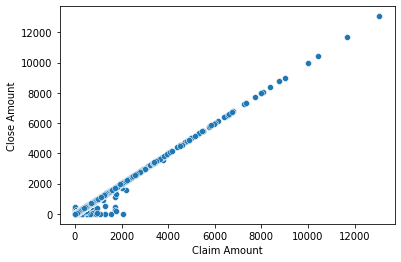

In [40]:
# One last check before we decide to fill close amount with claim amount in approved claims
remove_and_format(df_approved, ['Claim Amount', 'Close Amount'], ['$', ';'], 'float64')
sns.scatterplot(data = df_approved, x='Claim Amount', y='Close Amount')


In [41]:
# check if close amount = 0 in denied or canceled claims
df_deny_canceled = raw_data[raw_data['Status'].isin(['Deny','Denied', 'Canceled'])].copy()
remove_and_format(df_deny_canceled, ['Claim Amount', 'Close Amount'], ['$', ';'], 'float64')

# check how many rows where close amount = 0 in denied or canceled claims
# True : close amount = 0
# False : close amount != 0
df_deny_canceled = df_deny_canceled.dropna(subset='Close Amount')
print((df_deny_canceled['Close Amount']==0).value_counts())

df_deny_canceled.head()

True     70204
False     1013
Name: Close Amount, dtype: int64


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
15,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.0,Denied,0.0,Deny
16,15324,12-Jul-02,6/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),50.0,Denied,0.0,Deny
17,15361,15-Jul-02,3/11/2002 0:00,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.0,Denied,0.0,Deny
19,0714534M,22-Jul-02,3/6/2002 0:00,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,68.0,Denied,0.0,Deny
22,0616723L,5-Aug-02,NaN,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.0,Deny


Well, we can see most of our data follow the assumptions we made. <br><br>

Now, it is pretty safe to fill the `Close  Amount` with `Claim Amount` if the claims are **approved**. As for the rest, we will be left with **denied claims**, **canceled claims**, **settled claims**, or maybe claims that are **still in process**. I will fill the missing values with **0** because it makes sense if the claims are denied or still in process the `Close Amount` should be 0. <br><br>

We will also replace all the `Close Amount` values in **denied claims** or **canceled claims** into **0** because it won't make any sense either way.<br><br>

We have to do some cleaning and formatting first, so the data can be read as numerical values.


In [42]:
remove_and_format(df, 'Close Amount', ['$', ';'], 'float64')

df.groupby('Claim Type')['Close Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compliment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee Loss (MPCECA),434.0,106.916198,236.326607,0.0,0.0,23.500,114.3750,2929.51
Motor Vehicle,154.0,1171.238312,1689.686994,0.0,0.0,733.625,1424.4750,11672.23
Passenger Property Loss,83132.0,87.990502,974.812495,0.0,0.0,0.000,60.6075,250000.00
Passenger Theft,443.0,142.112867,551.354302,0.0,0.0,29.500,100.0000,9999.99
Personal Injury,729.0,1023.877229,6522.799860,0.0,0.0,0.000,25.7300,125000.00
Property Damage,49314.0,98.369731,303.841341,0.0,0.0,20.505,79.5000,15000.00


In [43]:
#fill the missing values with claim amount in approved claims
df_approved = df[(df['Disposition'] == 'Approve in Full')|(df['Status'] == 'Approve in Full')]
df_approved = df_approved[df_approved['Close Amount'].isnull()]


df.loc[df_approved.index, 'Close Amount'] = df.loc[df_approved.index, 'Claim Amount'] 
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


In [44]:
# fill the rest of missing values with 0
df['Close Amount'] = df['Close Amount'].fillna(0)

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


In [45]:
# replace all close amount values in denied or canceled claims into 0
df_deny_canceled = df[df['Status'].isin(['Deny', 'Canceled'])]

df.loc[df_deny_canceled.index, 'Close Amount'] = 0

# check if all the values have been replaced
df_deny_canceled = df[df['Status'].isin(['Deny', 'Canceled'])]
(df_deny_canceled['Close Amount'] == 0).value_counts()

True    102622
Name: Close Amount, dtype: int64

##### Disposition
Finally, we get to the last column. I will make it simple for  the `Disposition` column. I will fill the missing values with either **'Approve in Full'**, **'Deny'**, or **'Settle'** based on the `Status`.If the `Status` is neither 'Approve in Full', 'Deny', nor 'Settle', then the missing values will be filled with **'Not Available'**. It means the claims probably have not been resolved yet.

In [46]:
list_status = ['Approve in Full', 'Deny', 'Settle']

missing_disposition = df[(df['Disposition'].isnull()) & (df['Status'].isin(list_status))]

df.loc[missing_disposition.index, 'Disposition'] = df.loc[missing_disposition.index, 'Status']

df['Disposition'] = df['Disposition'].fillna('Not Available')



missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.0
1,Date Received,0,0.0
2,Incident Date,0,0.0
3,Airport Code,0,0.0
4,Airport Name,0,0.0
5,Airline Name,0,0.0
6,Claim Type,0,0.0
7,Claim Site,0,0.0
8,Item,0,0.0
9,Claim Amount,0,0.0


#### Data Formatting <a class="anchor" id="data-formatting"></a>

We will do data formatting so the data will go to the right data type. Let's see how is it going now

In [47]:
# function to change the date format
# ex: date_format('12/20/2002 0:00') --> it will change the format into '20-Dec-02'
def date_format(x):
    date_list = x.split('/')
    month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    day = date_list[1] 
    month = month_list[int(date_list[0])-1]
    year = date_list[2][2:4]
    
    new_format = f'{day}-{month}-{year}'

    return new_format        

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201847 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Claim Number   201847 non-null  object 
 1   Date Received  201847 non-null  object 
 2   Incident Date  201847 non-null  object 
 3   Airport Code   201847 non-null  object 
 4   Airport Name   201847 non-null  object 
 5   Airline Name   201847 non-null  object 
 6   Claim Type     201847 non-null  object 
 7   Claim Site     201847 non-null  object 
 8   Item           201847 non-null  object 
 9   Claim Amount   201847 non-null  float64
 10  Status         201847 non-null  object 
 11  Close Amount   201847 non-null  float64
 12  Disposition    201847 non-null  object 
dtypes: float64(2), object(11)
memory usage: 25.6+ MB


So, our only problem now is to change the `Date Received` and `Incident Date` into Datetime data type.

In [49]:
wrong_date_format_1 = df[df['Incident Date'].str.contains('/')]
wrong_date_format_1.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approve in Full,84.79,Approve in Full


In [50]:
wrong_date_format_2 = df[df['Incident Date'].str.contains('\d+-\w+-\d+\s\d', regex=True)]
wrong_date_format_2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
28862,0226594M,26-Feb-04,03-SEP-0300 00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),150.00,Canceled,0.00,Not Available
51558,2005012474094,7-Dec-04,10-OCT-0200 00:00,CLE,Cleveland Hopkins International,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,52.92,Settle,26.46,Settle
52196,2005010673015,14-Dec-04,05-DEC-0204 00:00,FLL,Ft. Lauderdale-Hollywood International,Jet Blue,Passenger Property Loss,Checked Baggage,Other,400.00,Settle,200.00,Settle
52637,2005011073340,21-Dec-04,20-MAR-0201 00:00,SFO,San Francisco International,USAir,Property Damage,Checked Baggage,Luggage (all types including footlockers),200.00,Canceled,0.00,Not Available
52918,2005011273547,27-Dec-04,25-SEP-0204 00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Computer - Laptop,399.00,Closed as a contractor claim,0.00,Not Available


There are 2 types of wrong date format. I will fix the `wrong_date_format_1` and drop the `wrong_date_format_2` because it can not be interpreted. 

In [51]:
df = df.drop(wrong_date_format_2.index)
df.loc[wrong_date_format_1.index, 'Incident Date'] = df.loc[wrong_date_format_1.index, 'Incident Date'].apply(date_format)

df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12-Dec-02,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,Approve in Full
1,0202417M,2-Feb-02,16-Jan-04,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,Settle
2,0202445M,4-Feb-02,26-Nov-03,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,Settle
3,0909816M,7-Feb-02,6-Jan-03,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,Approve in Full
4,2005032379513,18-Feb-02,5-Feb-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approve in Full,84.79,Approve in Full


Now, all the dates seems to have the right format. But there's one date that has a **typo** and causing error. We will fix it and format our date into datetime.

In [52]:
typo_date = df[df['Incident Date'].str.contains('30-Jun-$', regex=True)]
typo_date

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
151914,2010082375250,19-Aug-10,30-Jun-,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Motor Vehicle,Motor Vehicle,Other,829.93,Approve in Full,829.93,Approve in Full


In [53]:
raw_data.loc[typo_date.index] # to see the actual date in the raw data

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
151914,2010082375250,19-Aug-10,6/30/10,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,-,-,$829.93,Approve in Full,NaN,NaN


In [54]:
df.loc[typo_date.index, 'Incident Date'] = '30-Jun-10' # fixing the typo

In [55]:
# formatting our date into datetime
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 201683 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   201683 non-null  object        
 1   Date Received  201683 non-null  datetime64[ns]
 2   Incident Date  201683 non-null  datetime64[ns]
 3   Airport Code   201683 non-null  object        
 4   Airport Name   201683 non-null  object        
 5   Airline Name   201683 non-null  object        
 6   Claim Type     201683 non-null  object        
 7   Claim Site     201683 non-null  object        
 8   Item           201683 non-null  object        
 9   Claim Amount   201683 non-null  float64       
 10  Status         201683 non-null  object        
 11  Close Amount   201683 non-null  float64       
 12  Disposition    201683 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 25.6+ MB


All the data types are now correct, but there's something odd in the `Date Received` and `Incident Date` columns. Notice some of the `Date Received` are actually older than the `Incident Date`. Of course, it doen't make sense because how can we received a claim before the incident happens?

In [56]:
odd_dates = df[df['Date Received'] < df['Incident Date']]
odd_dates.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approve in Full,84.79,Approve in Full


There are **1,615 rows** of these anomalies. Because the number is not too big comparing to our data, I will **drop** these rows. I chose not to fix them because it's hard to guess the right date without a proper domain knowledge.

In [57]:
df = df.drop(odd_dates.index)

#### Duplicates <a class="anchor" id="duplicates"></a>

Let's check the duplicates in the overall data first. After that, we will check duplicates for the `Claim Number`, `Airport Code`, and `Airport Name`.

In [58]:
df.duplicated().sum()

1

In [59]:
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,2003-09-26,2003-09-13,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,0.0,Not Available
16842,2004050450432,2003-09-26,2003-09-13,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,0.0,Not Available


Because the duplicate is exactly the same, we will drop one of them.

In [60]:
df = df.drop_duplicates()

df.duplicated().sum()

0

Next, we will check the duplicates in `Claim Number`

In [61]:
df['Claim Number'].duplicated().sum()

22

In [62]:
duplicate_claim_number = df[df['Claim Number'].duplicated(keep=False)]
duplicate_claim_number.sort_values('Claim Number')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
180323,2013050203487,2013-05-01,2013-01-21,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available
196321,2013050203487,2015-02-27,2013-01-21,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,Other,0.00,Deny,0.0,Deny
180324,2013050603513,2013-05-01,2013-03-01,ZZZ,Unspecified Personal Injury,Delta Air Lines,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available
203532,2013050603513,2015-02-27,2013-03-01,SFO,San Francisco International,Delta Air Lines,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available
179950,2013051603705,2013-04-16,2013-03-30,HXD,Hilton Head Island Airport,USAir,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available
198611,2013051603705,2015-03-16,2013-03-30,HXD,Hilton Head Island Airport,USAir,Personal Injury,Checkpoint,Other,0.00,Deny,0.0,Deny
180125,2013053003894,2013-04-23,2013-04-22,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Motor Vehicle,Checked Baggage,Baggage/Cases/Purses,1140.89,Not Available,0.0,Not Available
186836,2013053003894,2014-04-18,2013-04-22,ACY,Atlantic City International,Spirit Airlines,Motor Vehicle,Motor Vehicle,Baggage/Cases/Purses,2233.86,Settle,0.0,Settle
183088,2013081205863,2013-08-07,2013-08-02,ZZZ,Unspecified Personal Injury,Delta Air Lines,Personal Injury,Motor Vehicle,Other,2500.00,Not Available,0.0,Not Available
186837,2013081205863,2014-04-24,2013-08-02,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Personal Injury,Motor Vehicle,Other,20000.00,Settle,0.0,Settle


The `Claim Number` duplicates are not exactly the same, I will keep the newer `Received Date` because the informations must be more updated.

In [63]:
df = df.sort_values('Date Received').drop_duplicates(subset='Claim Number', keep='last')

df['Claim Number'].duplicated().sum()

0

Next, we will check if each `Airport Code` has exactly one `Airport Name`

In [64]:
print('Number of unique of Airport Code=', df['Airport Code'].nunique())
print('Number of unique of Airport Name=', df['Airport Name'].nunique())

Number of unique of Airport Code= 464
Number of unique of Airport Name= 466


In [65]:
# check which airport code has more than one airport name
airport_name_unique = df.groupby('Airport Code')['Airport Name'].nunique()
airport_name_unique[airport_name_unique > 1]

Airport Code
BZN    2
EWR    2
PNS    2
Name: Airport Name, dtype: int64

In [66]:
# check thea airline name of the airport code
duplicate_airport_name = df.groupby('Airport Code')['Airport Name'].value_counts()
duplicate_airport_name[['BZN', 'EWR', 'PNS']]

Airport Code  Airport Name                             
BZN           Gallatin Field                                194
              Bozeman Yellowstone International Airport       1
EWR           Newark International Airport                 6773
              John F. Kennedy International                   1
PNS           Pensacola Regional                            226
              Pensacola International Airport                14
Name: Airport Name, dtype: int64

We will do data cleaning to make sure each `Airport Code` has only one `Airport Name`. I do some researches to decide which `Airport Name` will fit the `Airport Code`. The end result will be:
- BZN = Bozeman Yellowstone International Airport
- EWR = Newark International Airport
- PNS = Pensacola International Airport

In [67]:
df.loc[df['Airport Code'] == 'BZN', 'Airport Name'] = 'Bozeman Yellowstone International Airport'
df.loc[df['Airport Code'] == 'EWR', 'Airport Name'] = 'Newark International Airport'
df.loc[df['Airport Code'] == 'PNS', 'Airport Name'] = 'Pensacola International Airport'

print('Number of unique of Airport Code=', df['Airport Code'].nunique())
print('Number of unique of Airport Name=', df['Airport Name'].nunique())

Number of unique of Airport Code= 464
Number of unique of Airport Name= 464


#### Binning Categorical Variables <a class="anchor" id="binning"></a>
Binning categorical variables means lumping multiple categories together into a single category. You might wonder why would we bin categorical variables? Well, our data has huge number of uniques and it's hard to visualize. Besides, having too many uniques, especially rare ones, leads to a noisy dataset.

In [68]:
#function for binning `Item`
def item_group(df, col, col_group, category, list_item):
    df[col_group] = np.where((df[col].str.lower().str.contains('|'.join(list_item))) & (df[col_group] != ''),
                       df[col_group]+ ';' + category,
                       np.where((df[col].str.lower().str.contains('|'.join(list_item))) & (df[col_group] == ''),
                       df[col_group] + category,
                       df[col_group]
                       )
                      )

##### Disposition
Because our main focus are the approved and settled claims, I will group the disposition into two categories, which are 'Approved or Settled' and 'Denied or Not Available'. This way we have better view of what our target is.

In [69]:

df['Disposition Group'] = np.where(df['Disposition'].isin(['Approve in Full', 'Settle']),
                           'Approved or Settled',
                           'Denied or Not Available')

df.head()


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Disposition Group
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approve in Full,75.0,Approve in Full,Approved or Settled
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Not Available,Denied or Not Available
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Deny,0.0,Deny,Denied or Not Available
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approve in Full,17.0,Approve in Full,Approved or Settled
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Not Available,Denied or Not Available


##### Airport Code
The Airport Code has a large number of uniques and hard to be analyzed, so I try to bin it based on the state and region. I am using the [us-airports](https://ourairports.com/countries/US/airports.html) and [states](https://www.kaggle.com/datasets/omer2040/usa-states-to-region) dataset to help me get the state and region of the airport. Because we don't use all the columns in there, I already simplify the table into `us_airports.csv`.

In [70]:
us_airports = pd.read_csv('us_airports.csv')
us_airports.head()

,Airport Code,State Code,State,Region,Latitude,Longitude
0,LAX,CA,California,West,33.942501,-118.407997
1,SFO,CA,California,West,37.618999,-122.375000
2,SAN,CA,California,West,32.733601,-117.190002
3,SJC,CA,California,West,37.362452,-121.929188
4,OAK,CA,California,West,37.721298,-122.221001


In [71]:
df = df.merge(us_airports, how='left')
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Disposition Group,State Code,State,Region,Latitude,Longitude
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approve in Full,75.0,Approve in Full,Approved or Settled,MD,Maryland,South,39.175400,-76.668297
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Not Available,Denied or Not Available,AZ,Arizona,West,33.435302,-112.005905
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Deny,0.0,Deny,Denied or Not Available,GA,Georgia,South,33.636700,-84.428101
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approve in Full,17.0,Approve in Full,Approved or Settled,MD,Maryland,South,39.175400,-76.668297
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Not Available,Denied or Not Available,MD,Maryland,South,39.175400,-76.668297


In [72]:
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


In [73]:
# Airport codes that doesn't have a match
df[~df['Airport Code'].isin(us_airports['Airport Code'])].groupby(['Airport Code', 'Airport Name'])['Claim Number'].count()

Airport Code  Airport Name                                 
BQN           Rafael Hernandez                                   80
C             Civil Aviation; Non TSA manned Airport              2
CRQ           McClellan-Palomar                                  10
CYS           Cheyenne Regional Airport - Jerry Olson Field      10
F             Foreign airport                                  1704
GPI           Glacier Park Int.; Kalispell; MT                   33
GRO           Rota                                                1
GSN           Saipan International                               12
GUM           Guam                                              116
HDQ           Headquarters                                       26
HXD           Hilton Head Island Airport                         46
I             Insurance Subrogation Claim                        30
IWA           Mesa-Gateway Airport                               50
JQF           Concord Regional Airport                  

We don't have all the matching airport code in `us_airports` data, so it leaves us with some missing values. Because the percentage of missing values is small, I will fill the missing values with **'Not Available'** for the categorical data and **0** for the numerical data. But you can do better if you want to find the informations manually.

In [74]:
df[['State Code', 'State', 'Region']] = df[['State Code', 'State', 'Region']].fillna('Not Available')
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].fillna(0)
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.0
1,Date Received,0,0.0
2,Incident Date,0,0.0
3,Airport Code,0,0.0
4,Airport Name,0,0.0
5,Airline Name,0,0.0
6,Claim Type,0,0.0
7,Claim Site,0,0.0
8,Item,0,0.0
9,Claim Amount,0,0.0


##### Item
I can't bin all the uniques in `Item` column because there are too many uniques, but I will make ten big categories to help us identify the item. The ten categories are **Electronic**, **Luggage**, **Clothing**, **Jewelry**, **Accessories**, **Lock**, **Cosmetic & Medicine**, **Currency**, **Tools & Equipments**, and **Other**. These categories are made based on the most frequent items. Considering the `Item` column have many repeated words, the binning might not be so accurate. But this is as far as I can go.

In [75]:
# Binning the item based on certain keywords
df.insert(10, 'Item Group', value= '')

item_dict = {'Clothing':['clothing','shoes'],
             'Electronic': ['camera', 'computer', 'electronic', 'cell phone', 'video', 'audio', 'mp3',
                            'gps', 'dvd', 'cd', 'hearing aids'],

             'Luggage':['luggage','baggage', 'bag', 'briefcase', 'purse'],
             'Jewelry':['jewelry'],
             'Accessories':['personal accessories','eyeglasses', 'watches'],
             'Lock':['lock'],
             'Cosmetic & Medicine':['cosmetic','medicine', 'medical'],
             'Currency':['currency'],
             'Tool & Equipment':['tool','equipment']
}


for category, list_item in item_dict.items():
    item_group(df, 'Item', 'Item Group', category, list_item)




In [76]:
#Filling the rest of `Item Group` with 'Other'
df['Item Group'] = df['Item Group'].str.replace('^$', 'Other', regex=True)

#### Outliers <a class="anchor" id="outliers"></a>

In [77]:
df.describe()

,Claim Amount,Close Amount,Latitude,Longitude
count,2.000450e+05,200045.000000,200045.000000,200045.000000
mean,1.506722e+07,70.034894,35.705563,-92.731790
std,6.707471e+09,472.649099,8.318202,24.369387
min,0.000000e+00,0.000000,0.000000,-176.642783
25%,3.128000e+01,0.000000,32.896801,-115.152000
50%,1.238000e+02,0.000000,36.198399,-87.752403
75%,3.180000e+02,48.760000,40.692501,-78.732201
max,3.000000e+12,125000.000000,71.285402,0.000000


In [78]:
claim_amount_Q1 = df['Claim Amount'].quantile(0.25) 
claim_amount_Q3 = df['Claim Amount'].quantile(0.75) 
claim_amount_IQR = claim_amount_Q3 - claim_amount_Q1

claim_amount_outliers = df[(df['Claim Amount'] < (claim_amount_Q1 - 1.5 * claim_amount_IQR)) | (df['Claim Amount'] > (claim_amount_Q3 + 1.5 * claim_amount_IQR))]

print(f'Number of claim amount outliers = {len(claim_amount_outliers)}')
print(f'Percentage of claim amount outliers = {round(len(claim_amount_outliers)/len(df)*100, 2)}%')



Number of claim amount outliers = 24383
Percentage of claim amount outliers = 12.19%


<AxesSubplot:xlabel='Claim Amount'>

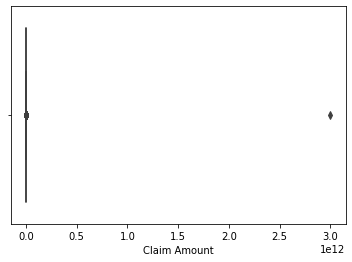

In [79]:
sns.boxplot(data=df, x ='Claim Amount')

There are **24,383** outliers in the `Claim Amount` which is **12.19%** of our data. The max value is 3,000,000,000,000. The distribution is positively-skewed as you can see on the boxplot.

In [80]:
close_amount_Q1 = df['Close Amount'].quantile(0.25) 
close_amount_Q3 = df['Close Amount'].quantile(0.75) 
close_amount_IQR = close_amount_Q3 - close_amount_Q1

close_amount_outliers = df[(df['Close Amount'] < (close_amount_Q1 - 1.5 * close_amount_IQR)) | (df['Close Amount'] > (close_amount_Q3 + 1.5 * close_amount_IQR))]

print(f'Number of close amount outliers = {len(close_amount_outliers)}')
print(f'Percentage of close amount outliers = {round(len(close_amount_outliers)/len(df)*100, 2)}%')


Number of close amount outliers = 26323
Percentage of close amount outliers = 13.16%


<AxesSubplot:xlabel='Close Amount'>

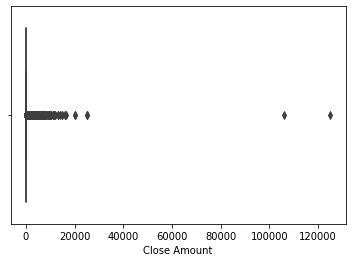

In [81]:
sns.boxplot(data=df, x ='Close Amount')

There are **26,323** outliers in the `Close Amount` which is **12.19%** of our data. The max value is 125,000. I will drop the top 2 highest value in `Close Amount` because the value is so extreme comparing to the other distribution. 

<AxesSubplot:xlabel='Close Amount'>

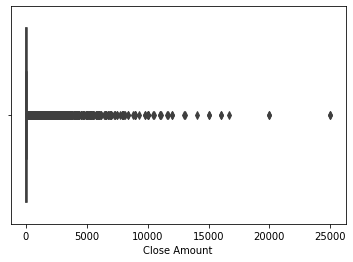

In [82]:
df = df.drop(df['Close Amount'].idxmax())
df = df.drop(df['Close Amount'].idxmax())
df.describe()
sns.boxplot(data=df, x ='Close Amount')

The distribution is better now, although there's still a lot of outliers. We can't drop the outliers because they're might be **true outliers**, which are outliers that represent true values from natural variation in the population. We just leave them for now.

### 4. Data Visualization & Analysis <a class="anchor" id="visualization"></a>
I will define some functions to help us visualize our data

In [83]:
def trend_month(df):
    df_trend = df.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
    df_trend = df_trend.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
    df_trend['Month Number'] = df_trend['Month'].dt.month
    df_trend['Month'] = df_trend['Month'].astype('str')

    df_trend_month = df_trend.groupby('Month Number')['Number of Incidents'].mean().to_frame().reset_index()
    df_trend_month = df_trend_month.rename(columns={'Month Number': 'Month'})

    plt.figure(figsize=(14,6))
    fig = sns.barplot(data= df_trend_month, x = 'Month', y = 'Number of Incidents')
    label = ['{:,.1f}'.format(x) for x in fig.containers[0].datavalues]
    fig.bar_label(fig.containers[0], labels=label)

    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title("Average Number of Incidents by Month")
  


def groupby_percentage(df, col) :
    df = df.groupby(col)['Claim Number'].count().to_frame().reset_index()
    df = df.rename(columns={'Claim Number':'Number of Incidents'})
    df['Percentage'] = df['Number of Incidents']/sum(df['Number of Incidents'])*100

    return df

#### **How are the characteristic of incindents that are filed against TSA?** <a class="anchor" id="question1"></a>
To answer this question, we will make some sub-questions:
1. [Where does most of the incidents happen at?](#q1)
2. [Which claim site does most of the incidents happen at?](#q2)
3. [What type of claims are most of the incidents?](#q3)
4. [What item does most people file claim for?](#q4)
5. [When is most of the incidents happen?](#q5)
6. [How are the claims resolved?](#q6)
7. [How much is paid for approved and settled claims?](#q7)


##### Where does most of the incidents happen at? <a class="anchor" id="q1"></a>

In [84]:
df_airport = groupby_percentage(df, ['Airport Code', 'Airport Name', 'State', 'Region'])
df_airport = df_airport.sort_values('Number of Incidents', ascending=False).head(10)
df_airport

,Airport Code,Airport Name,State,Region,Number of Incidents,Percentage
245,LAX,Los Angeles International Airport,California,West,16687,8.341707
231,JFK,John F. Kennedy International,New York,Northeast,9128,4.563019
137,EWR,Newark International Airport,New Jersey,Northeast,6774,3.386272
320,ORD,Chicago O'Hare International Airport,Illinois,Midwest,6744,3.371275
287,MIA,Miami International Airport,Florida,South,6339,3.168819
275,MCO,Orlando International Airport,Florida,South,6326,3.162320
27,ATL,Hartsfield-Jackson Atlanta International Airport,Georgia,South,5798,2.898377
397,SEA,Seattle-Tacoma International,Washington,West,5346,2.672425
338,PHX,Phoenix Sky Harbor International,Arizona,West,4999,2.498963
243,LAS,McCarran International,Nevada,West,4993,2.495963


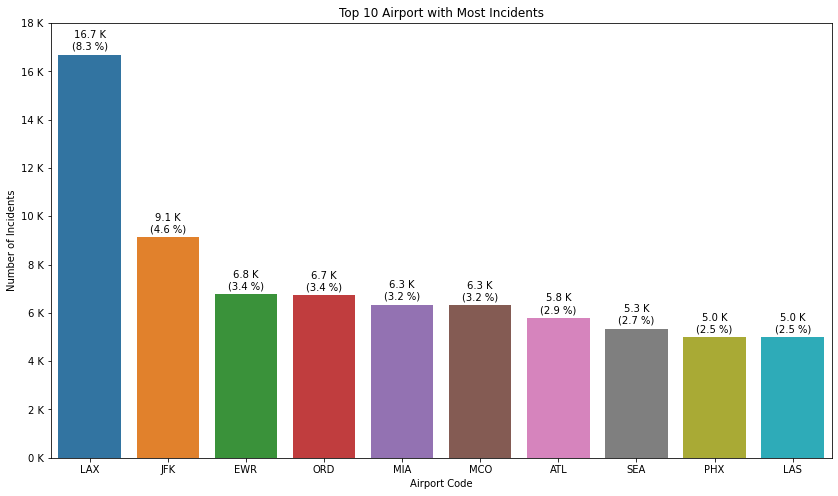

In [85]:
plt.figure(figsize=(14,8))
fig = sns.barplot(data= df_airport, x = 'Airport Code', y = 'Number of Incidents')

label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000, df_airport['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0,18001, 2000))
fig.set_yticklabels(ytick_label)


plt.title('Top 10 Airport with Most Incidents')
plt.show()


**Insight**:

Based on the airport, most of the incidents happen at **'LAX'**  or **Los Angeles International Airport** which is **8.3%** of the incidents, followed with **'JFK'** or **John F. Kennedy International** which is **4.6%** of the incidents, and **'EWR'** or **Newark International Airport** which is **3.4%** of the incidents.

In [86]:
df_state = groupby_percentage(df, ['State', 'Region'])
df_state = df_state.sort_values('Number of Incidents', ascending=False).head()
df_state

,State,Region,Number of Incidents,Percentage
4,California,West,30263,15.128247
9,Florida,South,25157,12.575796
32,New York,Northeast,16245,8.120754
44,Texas,South,12846,6.421619
13,Illinois,Midwest,8733,4.365561


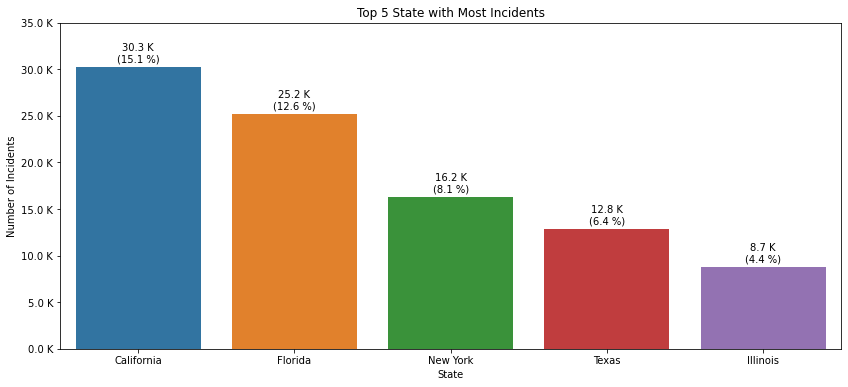

In [87]:
plt.figure(figsize=(14,6))
fig = sns.barplot(data= df_state, x = 'State', y = 'Number of Incidents')

label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000, df_state['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)

ytick_label = ['{:,.1f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0, 35001, 5000))
fig.set_yticklabels(ytick_label)

plt.title('Top 5 State with Most Incidents')

plt.show()

**Insight**:

Based on the state, most of the incidents happen in **'California'** with **15.1%** of the incidents, followed with **'Florida'** with **12.6%** of the incidents, and **'New York'** with **8.1%** of the incidents. So, we might prioritize the top 5 states for further investigation, rather than investigating each airport individually. 

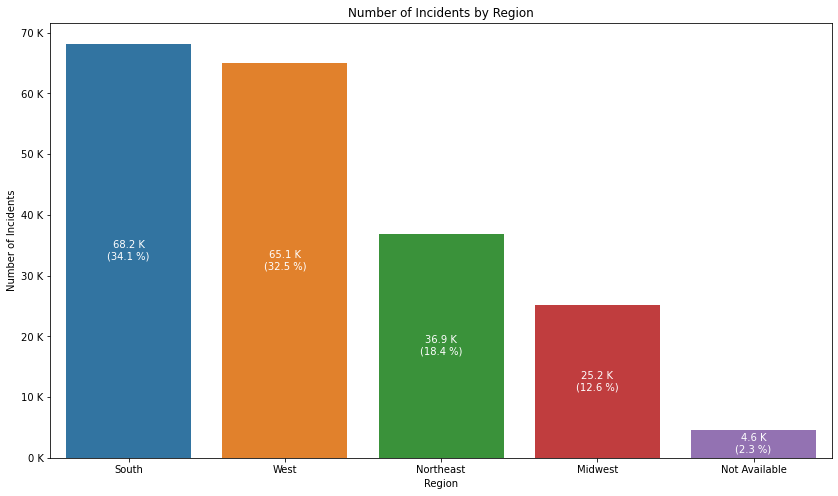

In [88]:
plt.figure(figsize=(14,8))
fig = sns.countplot(data= df, x = 'Region', order=df['Region'].value_counts().index)

percentage = df['Region'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label, label_type='center', color='white')

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0, 70001, 10000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Region')

plt.show()

**Insight**:

Based on the region, most of the incidents happen in **'South'** with **34.1%** of the incidents, followed with **'West'** with **32.5%** of the incidents, and **'Northeast'** with **18.4%** of the incidents. So, we might prioritize South and West region for further investigation.

##### Which claim site does most of the incidents happen at? <a class="anchor" id="q2"></a>

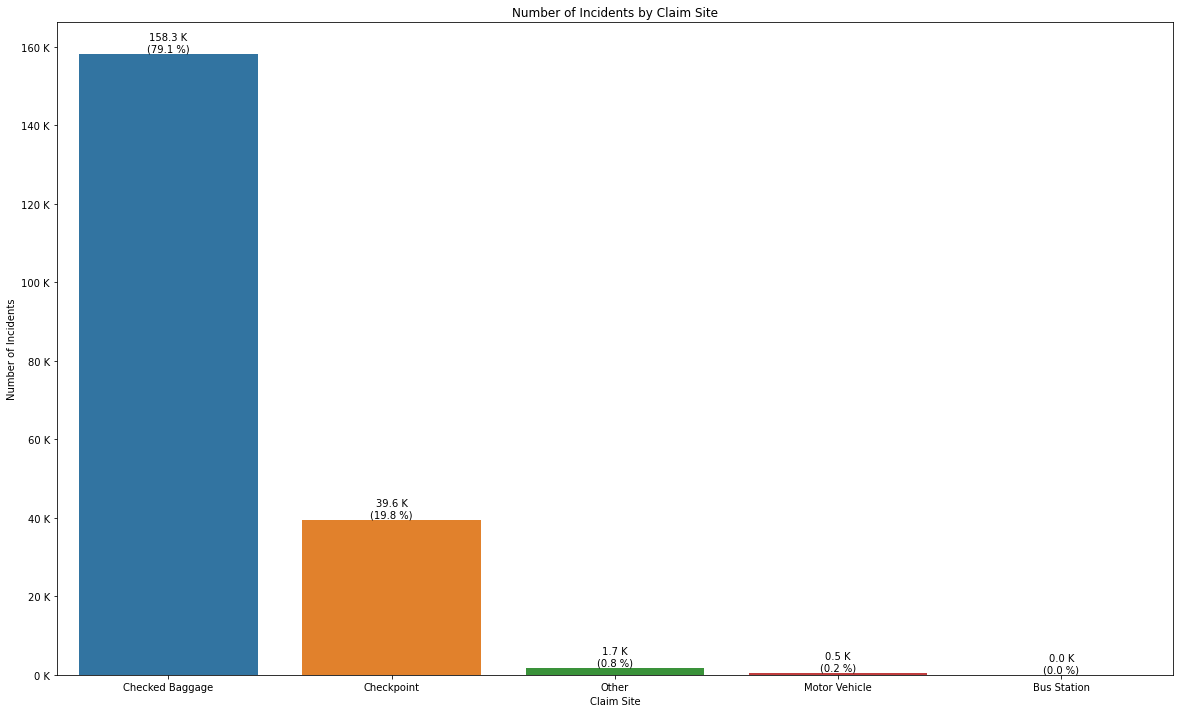

In [89]:
plt.figure(figsize=(20,12))
fig = sns.countplot(data= df, x = 'Claim Site', order=df['Claim Site'].value_counts().index)

percentage = df['Claim Site'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,160001, 20000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Claim Site')

plt.show()

**Insight**:

Most of the incidents happen at **'Checked Baggage'** which is **79.1%** of the incidents, followed by **'Checkpoint'** which is **19.8%** of the incidents. These two sites have a lot of incidents because all passenger have to get their bag checked in these sites, but not all passenger using motor vehicle or bus station. Hence, it's only natural for these two sites to have more incidents than the other claim sites.

##### What type of claims are most of the incidents? <a class="anchor" id="q3"></a>

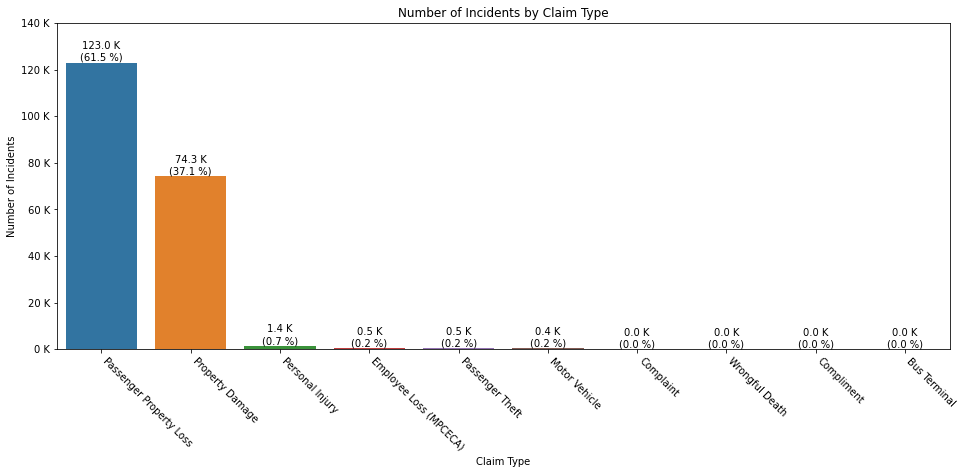

In [90]:
plt.figure(figsize=(16,6))
fig = sns.countplot(data= df, x = 'Claim Type', order=df['Claim Type'].value_counts().index)

percentage = df['Claim Type'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0,140001, 20000))
fig.set_yticklabels(ytick_label)


plt.xticks(rotation= -45, ha = 'left')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Claim Type')

plt.show()

**Insight**:

Most of the incidents claim type are **'Passenger Property Loss'** which is **61.5%** of the incidents, followed by **'Property Damage'** which is **37.1%** of the incidents. This insight in-line with the claim site analysis. Because there are a lot of baggage checking, therefore the chance of property lost or damaged are higher than any other types.

##### What item does most people file claim for? <a class="anchor" id="q4"></a>

In [91]:
item_dict['Other'] = ['']

df_item = pd.DataFrame()
for i, j in item_dict.items():
    item = i
    value = df['Item Group'].str.contains(i).sum()

    row = pd.DataFrame([[item, value,]], columns=['Item', 'Number of Claims'])
    df_item = pd.concat([df_item, row], ignore_index= True)

df_item = df_item.sort_values('Number of Claims', ascending=False)
df_item['Percentage'] = df_item['Number of Claims']/len(df)*100
df_item

,Item,Number of Claims,Percentage
9,Other,58227,29.107242
1,Electronic,40344,20.167664
2,Luggage,30940,15.466675
5,Lock,30805,15.399189
0,Clothing,25017,12.505811
3,Jewelry,17939,8.967572
4,Accessories,14125,7.060982
6,Cosmetic & Medicine,12263,6.130182
8,Tool & Equipment,4333,2.166034
7,Currency,4098,2.048560


**Note**: the total of percentage might not be 100% because people can claim for multiple items. Number of claims represent how many claims include the item. ex: There are 40,344 claims that include elctronic in their item.

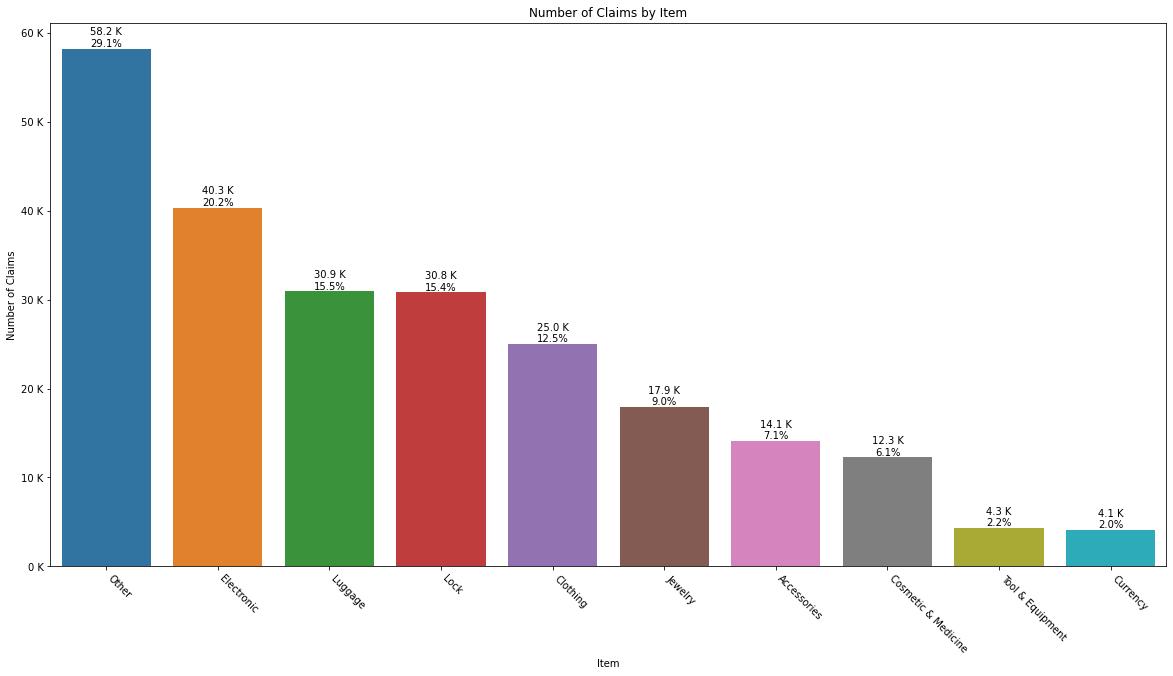

In [92]:
plt.figure(figsize=(20,10))
fig = sns.barplot(data= df_item, x = 'Item', y = 'Number of Claims')

label = ['{:,.1f} K\n{:.1f}%'.format(x,y) for x,y in zip ((fig.containers[0].datavalues/1000), df_item['Percentage'])]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,60001, 10000))
fig.set_yticklabels(ytick_label)

plt.xticks(rotation= -45, ha = 'left')
plt.title('Number of Claims by Item')

plt.show()

**Insight**:

Most people claim for **'Other'** (category outside the other 9 categories) with **29.1%** of the claims include it, followed by **'Electronic'** with **20.2%** of the claims include it, and '**Luggage'** with **15.5%** of the claims include it. TSA must check all baggages that contains electronic, so it has higher chance of lost or damaged. Besides, electronics are easily lost or damaged in the first place. Next, the luggage is really common to be damaged in checked baggaged because sometimes they need to be open with force.

**Note**: the total of percentage might not be 100% because people can claim for multiple items. Number of claims represent how many claims include the item. ex: There are 40,344 claims that include elctronic in their item.


##### When is most of the incidents happen? <a class="anchor" id="q5"></a>

In [93]:
df_2011_2015 = df[df['Incident Date'].dt.year >= 2011]
df_trend = df_2011_2015.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
df_trend = df_trend.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
df_trend['Month Number'] = df_trend['Month'].dt.month
df_trend['Month'] = df_trend['Month'].astype('str')
df_trend.head()

,Month,Number of Incidents,Month Number
0,2011-01,887,1
1,2011-02,727,2
2,2011-03,971,3
3,2011-04,944,4
4,2011-05,945,5


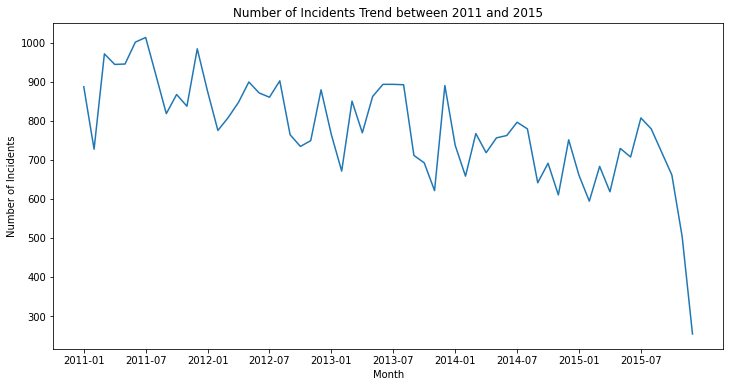

In [94]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_trend, x='Month', y= 'Number of Incidents')


plt.xticks(range(0,60,6))
plt.title('Number of Incidents Trend between 2011 and 2015')

plt.show()

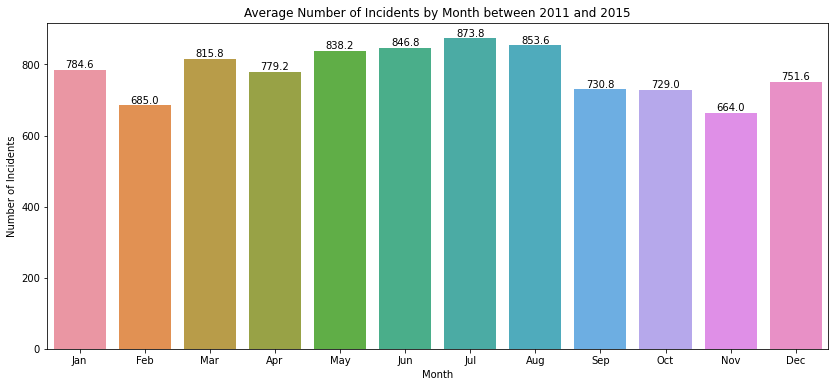

In [95]:
trend_month(df_2011_2015)
plt.title('Average Number of Incidents by Month between 2011 and 2015')
plt.show()

**Insight**:

Number of incidents tend to be **highest** in **'July'** and **lowest** in **'November'**. The pattern clearly can be seen in both graph. This trend needs more analysis with the overall number of flights trend because it's only normal if there are more flight then there are also more incidents.

##### How are the claims resolved? <a class="anchor" id="q6"></a>

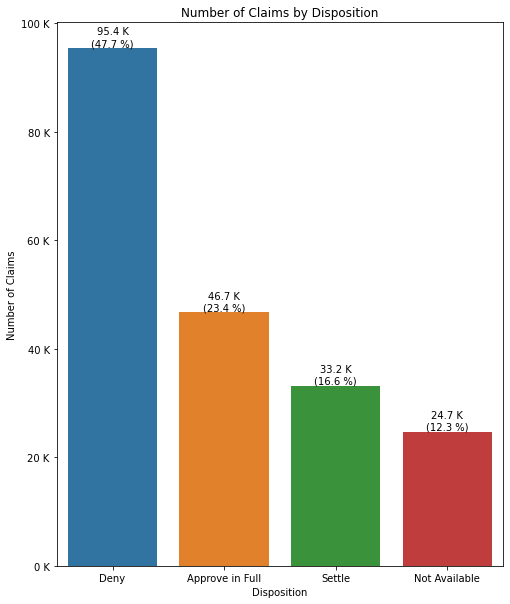

In [96]:
plt.figure(figsize=(8,10))
fig = sns.countplot(data= df, x = 'Disposition', order=df['Disposition'].value_counts().index)

percentage = df['Disposition'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,100001, 20000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Claims')
plt.title('Number of Claims by Disposition')

plt.show()

In [97]:
df.insert(3, 'Incident Year', value='')
df['Incident Year'] = df['Incident Date'].dt.year
df.head()

,Claim Number,Date Received,Incident Date,Incident Year,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,...,Item Group,Status,Close Amount,Disposition,Disposition Group,State Code,State,Region,Latitude,Longitude
0,12772,2002-06-20,2002-05-09,2002,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,...,Clothing,Approve in Full,75.0,Approve in Full,Approved or Settled,MD,Maryland,South,39.175400,-76.668297
1,14268,2002-06-20,2002-06-16,2002,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,...,Electronic,Canceled,0.0,Not Available,Denied or Not Available,AZ,Arizona,West,33.435302,-112.005905
2,2004102965797,2002-06-25,2002-05-04,2002,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,...,Jewelry,Deny,0.0,Deny,Denied or Not Available,GA,Georgia,South,33.636700,-84.428101
3,14460,2002-07-08,2002-06-12,2002,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),...,Accessories,Approve in Full,17.0,Approve in Full,Approved or Settled,MD,Maryland,South,39.175400,-76.668297
4,13334,2002-07-08,2002-06-04,2002,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,...,Clothing,Canceled,0.0,Not Available,Denied or Not Available,MD,Maryland,South,39.175400,-76.668297


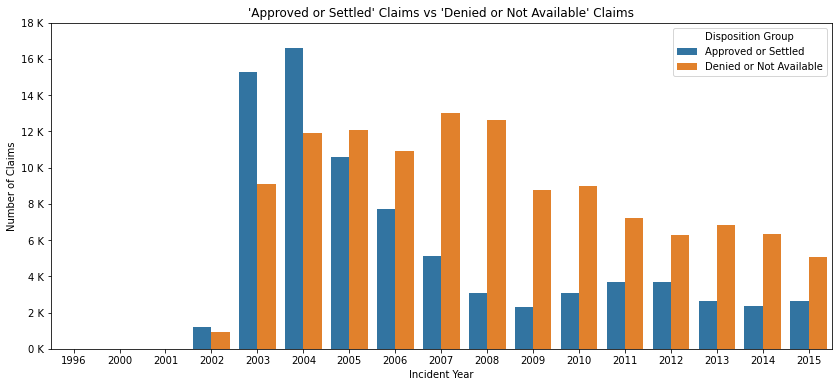

In [98]:
plt.figure(figsize=(14,6))
fig = sns.countplot(data=df, x = 'Incident Year', hue='Disposition Group')

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0,18001, 2000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Claims')
plt.title("'Approved or Settled' Claims vs 'Denied or Not Available' Claims")

plt.show()

**Insight**:

**47.7%** of claims filed are **denied** by TSA. The number of approved or settled claims are highest in **2004** and keep dropping until **2009**. From there, the number of approved or settled claims tend to be **stable**. This might be a good starting point to analyze more why 2003 and 2004 have a lot of approved or settled claims and 2009 has a really small approved or settled claims.

##### How much is paid for approved and settled claims? <a class="anchor" id="q7"></a>


In [99]:
# new df that only consist of approved or settled claims
df_approved_settled = df[df['Disposition Group']=='Approved or Settled']
df_approved_settled[['Close Amount']].describe()

,Close Amount
count,79896.000000
mean,172.463331
std,453.523203
min,0.000000
25%,26.990000
50%,65.000000
75%,165.615000
max,25000.000000


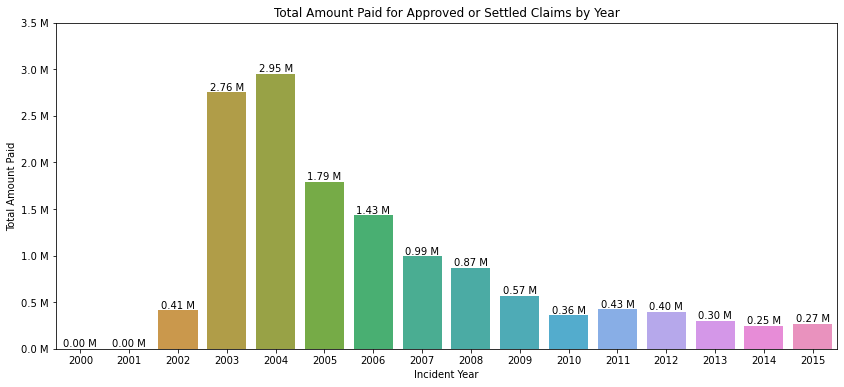

In [100]:
plt.figure(figsize=(14,6))
fig = sns.barplot(data= df_approved_settled, x = 'Incident Year', y = 'Close Amount', estimator=sum, ci=0)

label = ['{:,.2f} M'.format(x) for x in (fig.containers[0].datavalues/1000000)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.1f} M'.format(x) for x in (fig.get_yticks()/1000000)]
fig.set_yticks(range(0,3500001, 500000))
fig.set_yticklabels(labels=ytick_label)

plt.ylabel('Total Amount Paid')
plt.title("Total Amount Paid for Approved or Settled Claims by Year")

plt.show()

**Insight**:

The highest total amount paid is **\$2.95M** in **2004** then it kept dropping until the lowest in **2010** with **$0.36M**. The total amounts paid for approved or settled claims are in-line with the number of approved or settled claims. We can also see from the statistics, the **lowest** amount paid for a claim is **\$0**, while the **highest** is **\$25,000**, and **average** of **\$172**. This indicates the distribution of the `Close Amount` is really spread out. 

#### **How are the characteristic of claims that have higher close amount paid?** <a class="anchor" id="question2"></a>
To answer with the question, we will make some sub-questions:
1. [Which claim type have the highest average amount paid?](#q8)
2. [Which claim site have the highest average amount paid?](#q9)
3. [Which item have the highest average amount paid?](#q10)


**note**: We will only use claims that are **approved or settled** for this analysis because our objective is to find the characteristics of claims that are actually paid. Besides, denied claims will have close amount of 0 and it will affect our data distribution.

##### Which claim type have the highest average amount paid? <a class="anchor" id="q8"></a>


For this analysis we would like to look at the distribution of the `Close Amount` based on the `Claim Type`. 

In [101]:
df_approved_settled.groupby('Claim Type').describe()['Close Amount']

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
Complaint,5.0,69.670000,65.325680,25.00,37.6000,50.000,50.7500,185.00
Employee Loss (MPCECA),271.0,169.093173,274.957583,0.00,29.6850,80.670,202.2800,2929.51
Motor Vehicle,203.0,1410.049852,1570.279236,0.00,500.0000,1000.000,1828.9850,11672.23
Passenger Property Loss,43176.0,164.329571,382.585738,0.00,25.0000,70.000,172.9925,16000.00
Passenger Theft,246.0,237.260650,704.405525,5.39,49.9925,87.475,202.0500,9999.99
Personal Injury,246.0,2185.673171,3872.894223,0.00,153.2975,613.495,2500.0000,25000.00
Property Damage,35748.0,161.004317,354.088844,0.00,30.0000,60.000,150.0000,15000.00


Close Amount Average by Claim Type
Passenger Property Loss: 164
Property Damage: 161
Motor Vehicle: 1,410
Personal Injury: 2,186
Passenger Theft: 237
Employee Loss (MPCECA): 169
Bus Terminal: 0
Complaint: 70


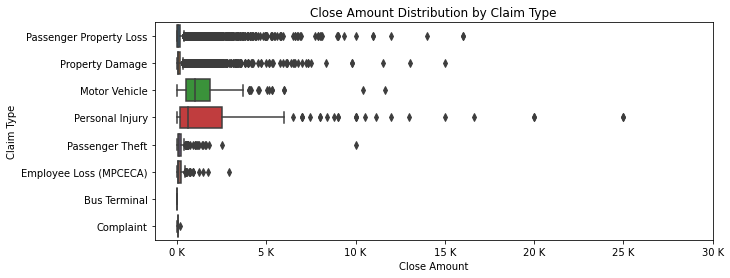

In [102]:
print(f'Close Amount Average by Claim Type')
for i in df_approved_settled['Claim Type'].unique():
    mean = df_approved_settled[df_approved_settled['Claim Type'] == i]['Close Amount'].mean()
    print(f'{i}: {mean:,.0f}')
    
plt.figure(figsize=(10,4))
fig = sns.boxplot(data = df_approved_settled, y='Claim Type', x='Close Amount')

xtick_label = ['{:,.0f} K'.format(x) for x in (fig.get_xticks()[1:]/1000)]
fig.set_xticks(range(0,30001, 5000))
fig.set_xticklabels(labels=xtick_label)

plt.title('Close Amount Distribution by Claim Type')

plt.show()

**Hypothesis Testing**

Based on the central limit theorem, the distribution of sample means approximates a normal distribution if the sample size is equal to or greater than 30. That's why we chose to use **Anova**. 

**Ho**: All claim types have equal close amount means

**Ha**: At least one claim type has a different close amount mean


In [103]:
claim_type = df['Claim Type'].unique()
stats, pvalue = f_oneway(*[df_approved_settled[df_approved_settled['Claim Type'] == i]['Close Amount'] for i in claim_type])

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue > 0.05. Fail to reject Ho. 
    At 5% significance level, we don't have enough evidence to say that 
    at least one claim type has a different close amount mean.
    ''')
else:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue <= 0.05. Reject Ho. 
    At 5% significance level, we have enough evidence to say that 
    at least one claim type has a different close amount mean.
    ''')


    pvalue = nan. pvalue <= 0.05. Reject Ho. 
    At 5% significance level, we have enough evidence to say that 
    at least one claim type has a different close amount mean.
    


c:\Users\cindy\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


**Insight**:

**Personal Injury** has the highest average amount paid of **\$2.2K**, followed by **Motor Vehicle** with **\$1.4K**. It is proven by the Anova test that at least one claim type has a different close amount mean. Although, there is only small number of incidents with these claim types, but the amount paid are much higher than property lost or damaged.

Now, it is clear that the outliers are indeed **true outliers** and not anomalies. As we can see from the graph, it makes sense for **Personal Injury** and **Motor Vehicle** to have higher `Close Amount`. That's why we are using `mean` for our analysis because it represent the true nature of our data.

##### Where is most of the 'Personal Injury' incidents happen? 

In [104]:
df_personal_injury = df[df['Claim Type'] == 'Personal Injury']

df_personal_injury_by_state = groupby_percentage(df_personal_injury, 'State')
df_personal_injury_by_state = df_personal_injury_by_state.sort_values('Number of Incidents', ascending=False).head()
df_personal_injury_by_state

,State,Number of Incidents,Percentage
4,California,205,14.216366
8,Florida,181,12.552011
33,Not Available,112,7.766990
31,New York,103,7.142857
41,Texas,90,6.241331


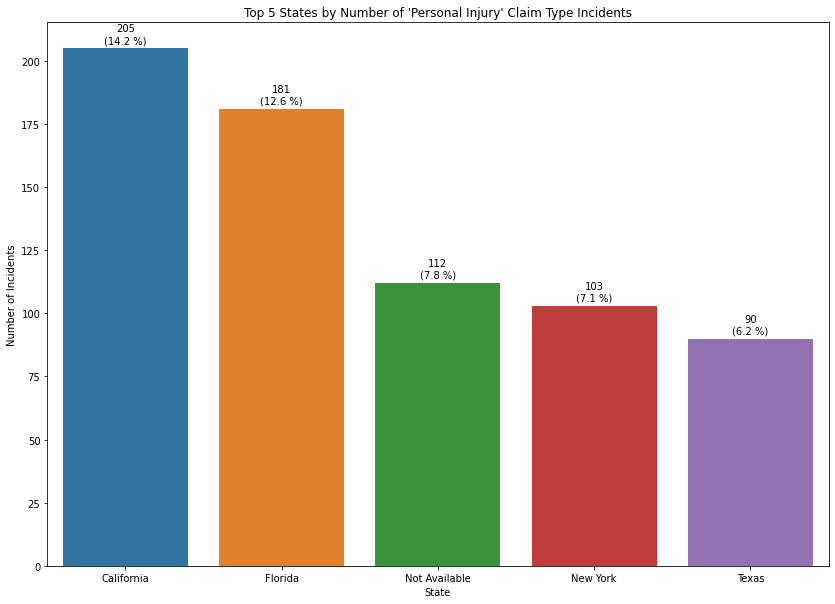

In [105]:
plt.figure(figsize=(14,10))
fig = sns.barplot(data= df_personal_injury_by_state, x = 'State', y = 'Number of Incidents')

label = ['{:.0f}\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues, df_personal_injury_by_state['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)

plt.title("Top 5 States by Number of 'Personal Injury' Claim Type Incidents")

plt.show()

**Insight**:

The 'Personal Injury' incidents mostly happen in **California** which is **14.2%** of the claims, followed with **Florida** which is **12.6%**.

##### When is most of the 'Personal Injury' incidents happen?

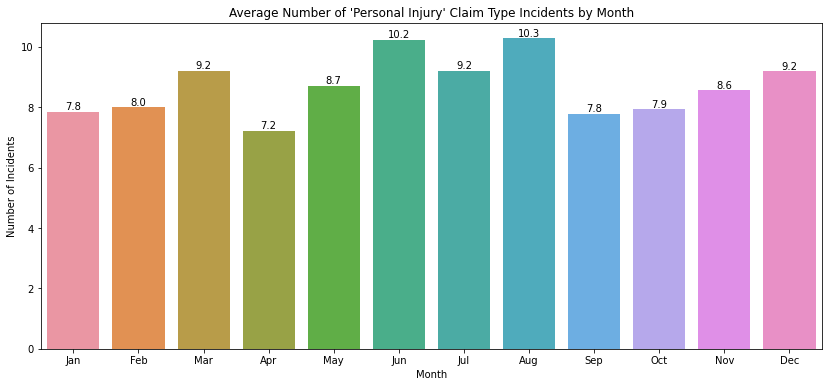

In [106]:
trend_month(df_personal_injury)

plt.title("Average Number of 'Personal Injury' Claim Type Incidents by Month")
plt.show()


**Insight**:

The 'Personal Injury' incidents mostly happen in **August** with average incidents of **10.3**. The rarest month with 'Personal Injury' incidents is **April** with average incidents of **7.2**. 


##### Which claim site have the highest average amount paid? <a class="anchor" id="q9"></a>

In [107]:
df_approved_settled.groupby('Claim Type').describe()['Close Amount']

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
Complaint,5.0,69.670000,65.325680,25.00,37.6000,50.000,50.7500,185.00
Employee Loss (MPCECA),271.0,169.093173,274.957583,0.00,29.6850,80.670,202.2800,2929.51
Motor Vehicle,203.0,1410.049852,1570.279236,0.00,500.0000,1000.000,1828.9850,11672.23
Passenger Property Loss,43176.0,164.329571,382.585738,0.00,25.0000,70.000,172.9925,16000.00
Passenger Theft,246.0,237.260650,704.405525,5.39,49.9925,87.475,202.0500,9999.99
Personal Injury,246.0,2185.673171,3872.894223,0.00,153.2975,613.495,2500.0000,25000.00
Property Damage,35748.0,161.004317,354.088844,0.00,30.0000,60.000,150.0000,15000.00


Close Amount Mean by Claim Site
Checkpoint: 259
Other: 310
Checked Baggage: 138
Motor Vehicle: 1,643
Bus Station: 400


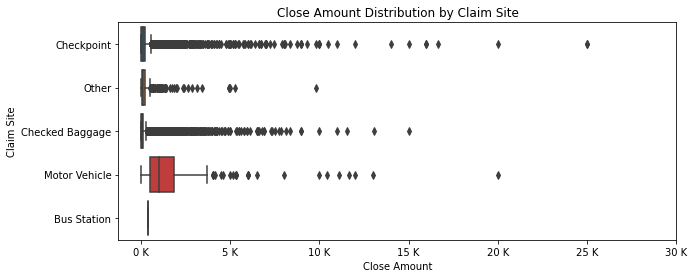

In [108]:

print(f'Close Amount Mean by Claim Site')
for i in df_approved_settled['Claim Site'].unique():
    mean = df_approved_settled[df_approved_settled['Claim Site'] == i]['Close Amount'].mean()
    print(f'{i}: {mean:,.0f}')

plt.figure(figsize=(10,4))
fig = sns.boxplot(data = df_approved_settled, y='Claim Site', x='Close Amount')

xtick_label = ['{:,.0f} K'.format(x) for x in (fig.get_xticks()[1:]/1000)]
fig.set_xticks(range(0,30001, 5000))
fig.set_xticklabels(labels=xtick_label)

plt.title('Close Amount Distribution by Claim Site')


plt.show()

**Hypothesis Testing**

Based on the central limit theorem, the distribution of sample means approximates a normal distribution if the sample size is equal to or greater than 30. That's why we chose to use **Anova**. 

**Ho**: All claim sites have equal means

**Ha**: At least one claim site has a different mean


In [109]:
claim_site = df['Claim Site'].unique()
stats, pvalue = f_oneway(*[df_approved_settled[df_approved_settled['Claim Site'] == i]['Close Amount'] for i in claim_site])

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue > 0.05. Fail to reject Ho. 
    At 5% significance level, we don't have enough evidence to say that 
    at least one claim site has a different close amount mean.
    ''')
else:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue <= 0.05. Reject Ho. 
    At 5% significance level, we have enough evidence to say that 
    at least one claim site has a different close amount mean.
    ''')


    pvalue = 0.000. pvalue <= 0.05. Reject Ho. 
    At 5% significance level, we have enough evidence to say that 
    at least one claim site has a different close amount mean.
    


**Insight**:

Claims that happened at **Motor Vehicle** has the highest average amount paid of **\$1.6K**. It is proven by the Anova test that at least one claim type has a different close amount mean. Again, incidents that happen in this site is rare but the amount paid is significantly different than the other claim sites.


As I said before, our data's nature is very spread out. So, although it has a lot of ouliers but it makes sense for claims that happened at **Motor Vehicle** to have higher `Close Amount`. That's also why we use mean for our analysis.

##### Where is most of the 'Motor Vehicle' incidents happen?

In [110]:
df_motor_vehicle = df[df['Claim Site'] == 'Motor Vehicle']

df_motor_vehicle_by_airport_code = groupby_percentage(df_motor_vehicle, ['Airport Code', 'Airport Name'])
df_motor_vehicle_by_airport_code = df_motor_vehicle_by_airport_code.sort_values('Number of Incidents', ascending=False).head()
df_motor_vehicle_by_airport_code

,Airport Code,Airport Name,Number of Incidents,Percentage
62,ZZX,Non TSA Airport (motor vehicle),272,57.995736
60,TSA,TSA - Non-Specified Airport,30,6.396588
23,I,Insurance Subrogation Claim,17,3.624733
20,HDQ,Headquarters,12,2.558635
26,JFK,John F. Kennedy International,9,1.918977


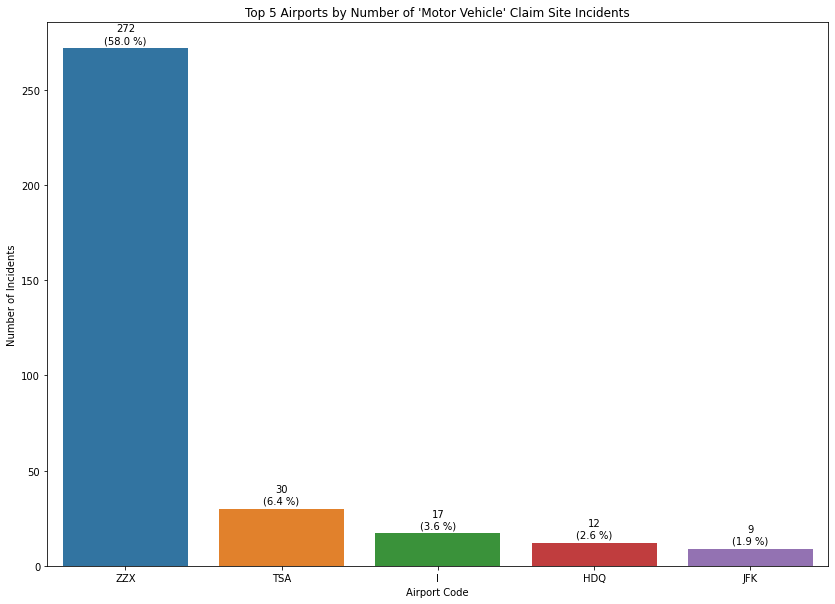

In [111]:
plt.figure(figsize=(14,10))
fig = sns.barplot(data= df_motor_vehicle_by_airport_code, x = 'Airport Code', y = 'Number of Incidents')

label = ['{:.0f}\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues, df_motor_vehicle_by_airport_code['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)

plt.title("Top 5 Airports by Number of 'Motor Vehicle' Claim Site Incidents")
plt.show()

**Insight**:

Most of 'Motor Vehicle' claim site incidents happened at airport **'ZZX'** or **Non TSA Airport (motor vehicle)** which is **58%** of the incidents. It means most 'Motor Vehicle' claim site incidents happen **outside airport area**.

##### When is most of the 'Motor Vehicle' incidents happen?

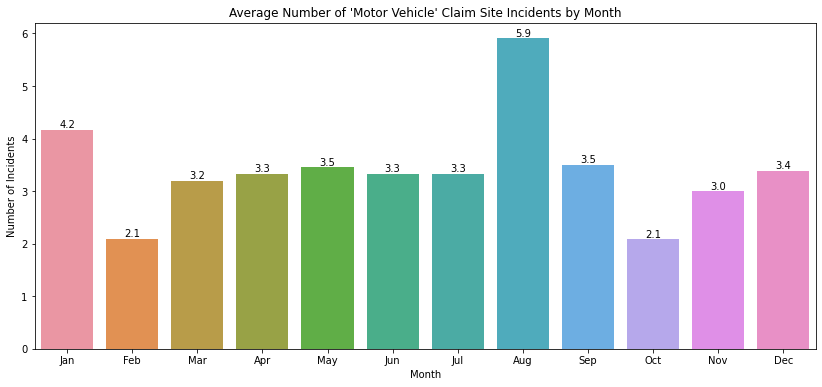

In [112]:
trend_month(df_motor_vehicle)

plt.title("Average Number of 'Motor Vehicle' Claim Site Incidents by Month")
plt.show()

**Insight**:

The 'Motor Vehicle' claim site incidents mostly happen in **August** with average incidents of **5.9**. The rarest month with 'Motor Vehicle' claim site incidents are **February** and **October** with average incidents of **2.1**.


##### Which item have the highest average amount paid? <a class="anchor" id="q10"></a>

In [113]:
item_amount_paid = pd.DataFrame()
for i, j in item_dict.items():
    item = i
    median = df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'].median()
    mean = df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'].mean()
    max = df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'].max()
    row = pd.DataFrame([[item, median, round(mean, 2), max]], 
                        columns=['Item', 'Close Amount Median', 'Close Amount Mean', 'Close Amount Max'])
    item_amount_paid = pd.concat([item_amount_paid, row], ignore_index= True)

item_amount_paid = item_amount_paid.sort_values('Close Amount Mean', ascending=False)
item_amount_paid 


,Item,Close Amount Median,Close Amount Mean,Close Amount Max
3,Jewelry,150.00,383.07,16000.00
1,Electronic,186.59,318.90,7241.24
7,Currency,100.00,227.56,5300.00
4,Accessories,140.00,211.66,9000.00
8,Tool & Equipment,82.28,195.99,8766.50
9,Other,55.24,161.34,25000.00
0,Clothing,70.00,117.72,20000.00
6,Cosmetic & Medicine,59.34,113.80,8766.50
2,Luggage,50.00,79.77,5800.00
5,Lock,49.00,66.63,11000.00


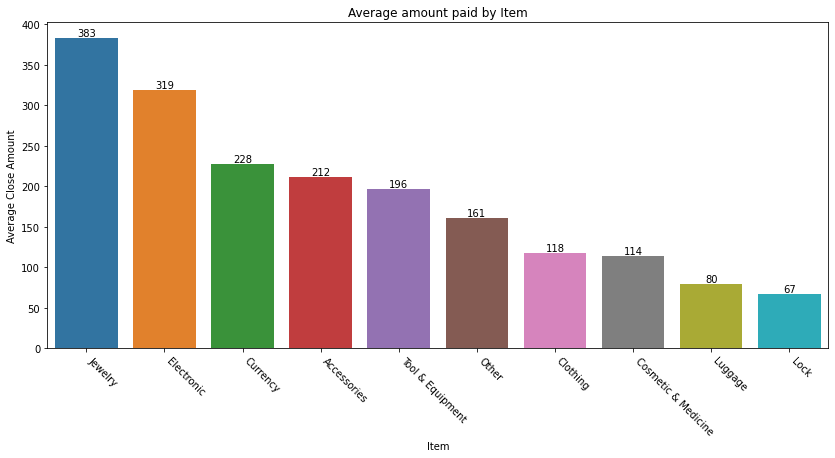

In [114]:
plt.figure(figsize=(14,6))
fig = sns.barplot(data= item_amount_paid, x = 'Item', y = 'Close Amount Mean')

label = ['{:,.0f}'.format(x) for x in (fig.containers[0].datavalues)]
fig.bar_label(fig.containers[0], labels=label)

plt.xticks(rotation= -45, ha = 'left')
plt.ylabel('Average Close Amount')
plt.title('Average amount paid by Item')

plt.show()

**Hypothesis Testing**

**Ho**: All items have equal close amount means

**Ha**: At least one item has a different close amount mean


In [115]:
items = item_amount_paid['Item'].unique()
stats, pvalue = f_oneway(*[df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'] for i in items])

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue > 0.05. Fail to reject Ho. 
    At 5% significance level, we don't have enough evidence to say that 
    at least one item has a different close amount mean.
    ''')
else:
    print(f'''
    pvalue = {pvalue:.3f}. pvalue <= 0.05. Reject Ho. 
    At 5% significance level, we have enough evidence to say that 
    at least one item has a different close amount mean.
    ''')


    pvalue = 0.000. pvalue <= 0.05. Reject Ho. 
    At 5% significance level, we have enough evidence to say that 
    at least one item has a different close amount mean.
    


**Insight**:

Item that has the highest amount paid is **Jewelry** with **\$383**, followed with **Electronic** with average of **\$319**, and **Currency** for **\$228**. It is proven by the Anova test that at least one claim type has a different close amount mean. It turns out items from 'Other' category don't have high amount paid comparing to 'Electronic'.


Of course, it also make sense for different item category to has variation in the average amount paid. The more luxurious items have higher amount paid. So, I use mean in our analysis because the outliers might be true outliers and not anomalies. 

## Conclusion <a class="anchor" id="conclusion"></a>

Characteristics of incidents that are filed against TSA are:
- Base on the **airport**, most incidents happen at **Los Angeles International Airport** (**8.3%**) .<br>
  Base on the **state**, most incidents happen in **California** (**15.1%**).<br>
  Base on the **region**, most incidents happen in **South** (**34.1%**).
  
- Most incidents happen at **Checked Baggage** (**79.1%**), followed by **Checkpoint** (**19.8%**) claim site.

- Most incidents categorize as **Passenger Property Loss** (**61.5%**), followed by **Property Damage** (**37.1%**).

- Most people claims for items in '**Other**'(**29.1%**) category, followed by **Electronic**(**20.2%**) .

- **Highest** number of incidents happen in **July** and **lowest** in **November**.

- Claims are mostly **denied** by TSA (**47.7%**)<br>
  The **highest** number of approved or settled claims happen in **2004** and the **lowest** in **2009**.
  
-  The **highest** total amount paid for approved or settled claims is **\$2.95M** in **2004** and the lowest is **\$0.36M** in **2010**.


Characteristics of claims that have higher amount paid are:
- Claims with higher amount paid categorize as **Personal Injury** with average amount paid of **$2.2K**.<br>
  Personal Injury incidents mostly happen in **California** state.<br>
  **Highest** number of Personal Injury Incidents happen on **August** with **10.3** average number of incidents and **lowest** in **April** with **7.2** average number of incidents

- Claims with higher amount paid happen at **Motor Vehicle** claim site with average amount paid of **$1.6K**.<br>
  Motor Vehicle incidents mostly happen at **Non TSA Airport (motor vehicle)**.<br>
  **Highest** number of  Motor Vehicle incidents happen on **August** with **5.9** average number of incidents and **lowest** in **February** and **October** with **2.1** average number of incidents

-  Claims item with highest amount paid is **Jewelry** with average amount paid of **\$383**, followed by **Elctronic** with average amount paid of **\$319**.



## Recommendation <a class="anchor" id="recommendation"></a>

There are two options how TSA can improve their services to lower expenses for claims:
1. by reducing the number of claims in general<br>
Since number of claims in-line with the total amount paid, if we reduce the number of claims, we might also lower expenses for claims
    - Focus more on improving services for checked baggage. Give more training about how to handle baggage.
    - Increase security for checked baggage to prevent property loss.
    - Suggest passenger to bring their electronic in carry-on bag rather than checked baggage.
    - Increase the number of security in July
    - TSA can either focus on Los Angeles International Airport, California state, or South region.  
  
  
  
2. by reducing the number of claims with higher amount paid
    - Pay more attention in handling passenger and not to cause physical injury, especially in August. Give more training how to handle troublesome passengers, escpecially in California state.
    - Increase the maintenance of motor vehicle, escpecially in August. Investigate more what's happening outside the airports that can cause any motor vehicle incidents.
    - Suggesting passengers not to keep their valuable items in checeked baggage and increasing the security to prevent property loss.
